In [29]:
import re
import numpy as np
import json
import os
import shutil
import urllib
import zipfile
import pandas as pd
import seaborn as sns
import numpy as np
from collections import defaultdict
import requests
from IPython.display import HTML
import matplotlib.pyplot as plt
import argparse
from IPython.display import Image

%matplotlib inline
plt.style.use('ggplot')

In [18]:
#This one is specific to finance!
PROPUBLICA_API_KEY = "PTpIFK1ROCXCHnMhtO88htsDzU4POhSGuLNolbzZ"

REP_ID = 'S6CA00584'

In [3]:
# #Finding Candidates by state

# STATE = 'CA'
# YEAR = '2016'

# #!curl "https://api.propublica.org/campaign-finance/v1/{YEAR}/races/{STATE}.json" -H "X-API-Key: {PROPUBLICA_API_KEY}" -o cand_by_state.json

In [4]:
# json_data=open('cand_by_state.json').read()
# data = json.loads(json_data)

In [19]:
#CREATING A MASSIVE DATA PULL


#String of States
all_states = "AL	AK	AZ	AR	CA	CO	CT	DE	DC	FL	GA	HI	ID	IL	IN	IA	KS	KY	LA	ME	MT	NE	NV	NH	NJ	NM	NY	NC	ND	OH	OK	OR	MD	MA	MI	MN	MS	MO	PA	RI	SC	SD	TN	TX	UT	VT	VA	WA	WV	WI"
#Make a list
states_list = [i for i in all_states.split("\t")]


#creating our massive dictionary to house all this
c_dict = defaultdict(dict)


#downloading all the candidates from all the states.....
for STATE in states_list:
    YEAR = '2016'
    #downloading file, this only needs to happen once... in a while
    #!curl "https://api.propublica.org/campaign-finance/v1/{YEAR}/races/{STATE}.json" -H "X-API-Key: {PROPUBLICA_API_KEY}" -o findata/{STATE}.json 

    FILE_ = "findata/" + STATE + ".json"
    #lets just read it in while we're at it
    json_data=open(FILE_).read()
    data = json.loads(json_data)

    #run our normal script that fills up our dictionary
    for i in data[u'results']:
        for k,v in i.iteritems():
            if k == 'candidate':
                try:
                    name = str(v[u'name']).split(",")[1] + " " + str(v[u'name']).split(",")[0]
                    #print v[u'party'], v[u'id'], name 
                    c_dict[str(v[u'id'])] = {'name': str(name), 'debts_owed': 0.0,
                    'total_contributions': 0.0,'total_disbursements': 0.0,
                     'total_from_individuals': 0.0,'total_from_pacs': 0.0,
                    'total_receipts': 0.0, 'total_refunds': 0.0,
                    'status':None, 'party': None}
                except:
                    c_dict[str(v[u'id'])] = {'name': str(v[u'name']), 'debts_owed': 0.0,
                    'total_contributions': 0.0,'total_disbursements': 0.0,
                     'total_from_individuals': 0.0,'total_from_pacs': 0.0,
                    'total_receipts': 0.0, 'total_refunds': 0.0,
                    'status':None, 'party': None}

    #status update
    #print STATE, " COMPLETE!"

In [7]:
# #For loop to create files for each candidate, only need to run once... in a while
# for k, v in c_dict.iteritems():
#     FEC_ID = str(k)
#     !curl "https://api.propublica.org/campaign-finance/v1/{YEAR}/candidates/{FEC_ID}.json" -H "X-API-Key: {PROPUBLICA_API_KEY}" -o findata/{FEC_ID}.json 

*********************

In [20]:
for k, v in c_dict.iteritems():
    FEC_ID = str(k)
    file_ = str('findata/') + FEC_ID + str('.json')
    json_data=open(file_).read()
    findata = json.loads(json_data)

    #Updating original dictionary with the new values
    for x in findata['results']:
        c_dict[FEC_ID]['debts_owed'] = x[u'debts_owed']
        c_dict[FEC_ID]['end_cash'] = x[u'end_cash']
        c_dict[FEC_ID]['total_contributions'] = x[u'total_contributions']
        c_dict[FEC_ID]['total_disbursements'] = x[u'total_disbursements']
        c_dict[FEC_ID]['total_from_individuals'] = x[u'total_from_individuals']
        c_dict[FEC_ID]['total_from_pacs'] = x[u'total_from_pacs']
        c_dict[FEC_ID]['total_receipts'] = x[u'total_receipts']
        c_dict[FEC_ID]['total_refunds'] = x[u'total_refunds']
        c_dict[FEC_ID]['status'] = x[u'status']
        c_dict[FEC_ID]['party'] = x[u'party']

*********************

In [21]:
#Create dataframe for analysis
df = pd.DataFrame(c_dict.values(), c_dict.keys())
df.reset_index(inplace=True)
df = df.rename(columns={'index':'id'})
#df.head()

In [11]:
#For import into google cloud MYSQL
#df.to_csv("findata/fincampaign.csv",index=False)

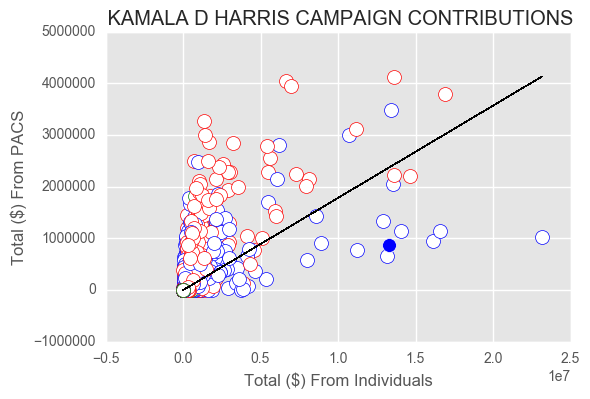

In [33]:
ids = [i for i in c_dict.keys()]
for ii in ids:
    if ii == REP_ID:
        if c_dict[str(ii)]['party'] == u'DEM':
            plt.scatter(c_dict[str(ii)]['total_from_individuals'],c_dict[str(ii)]['total_from_pacs'],s=100,c='b',edgecolors='w',zorder=10)
        elif c_dict[str(ii)]['party'] == u'REP':
            plt.scatter(c_dict[str(ii)]['total_from_individuals'],c_dict[str(ii)]['total_from_pacs'],s=100,c='r',edgecolors='w',zorder=10)
        else:
            plt.scatter(c_dict[str(ii)]['total_from_individuals'],c_dict[str(ii)]['total_from_pacs'],s=100,c='g',edgecolors='w',zorder=10)
        
    else:
        if c_dict[str(ii)]['party'] == u'DEM':
            plt.scatter(c_dict[str(ii)]['total_from_individuals'],c_dict[str(ii)]['total_from_pacs'],s=100,color='w',edgecolors='b')
        elif c_dict[str(ii)]['party'] == u'REP':
            plt.scatter(c_dict[str(ii)]['total_from_individuals'],c_dict[str(ii)]['total_from_pacs'],s=100,color='w',edgecolors='r')
        else:
            plt.scatter(c_dict[str(ii)]['total_from_individuals'],c_dict[str(ii)]['total_from_pacs'],s=100,color='w',edgecolors='g')
    
    plt.title(str(c_dict[REP_ID]['name']) + " CAMPAIGN CONTRIBUTIONS")
    plt.xlabel("Total ($) From Individuals")
    plt.ticklabel_format(style='sci', axis='y')
    plt.ticklabel_format(style='sci', axis='x')
    
    #Creating our line
    slope = df['total_from_pacs'].max()/df['total_from_individuals'].max()
    x_0 = 0
    y_0 = 0
    x_1 = df['total_from_individuals'].max()
    y_1 = slope*(x_1 - x_0) + y_0
    plt.plot([x_0, x_1], [y_0, y_1], linewidth=0.5,c='black') 
    plt.ylabel("Total ($) From PACS");
plt.savefig('findata.png')